<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50 = ResNet50(weights='imagenet')
features = model.predict(x)

```

Next you will need to remove the last layer from the ResNet model. Here, we loop over the layers to use the sequential API. There are easier ways to add and remove layers using the Keras functional API, but doing so introduces other complexities. 

```python
# Remote the Last Layer of ResNEt
ResNet50._layers.pop(0)

# Out New Model
model = Sequential()

# Add Pre-trained layers of Old Model to New Model
for layer in ResNet50.layers:
    model.add(layer)

# Turn off additional training of ResNet Layers for speed of assignment
for layer in model.layers:
    layer.trainable = False

# Add New Output Layer to Model
model.add(Dense(1, activation='sigmoid'))
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

In [102]:
import os
import warnings
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

warnings.simplefilter('ignore', FutureWarning)

In [110]:
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224,224))

def img_is_mountains(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)

In [3]:
paths = []
for i in ['forest', 'mountain']:
    for file in os.listdir('./data/'+i):
        if file[-3:] == 'jpg':
            path = os.path.join(f'./data/{i}/' + file)
            paths.append(path)

[('n09193705', 'alp', 0.5757379), ('n09468604', 'valley', 0.17029087), ('n09246464', 'cliff', 0.1665933)]


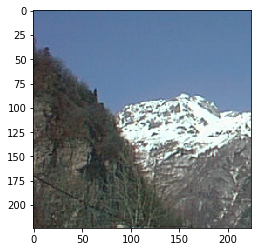

[('n09332890', 'lakeside', 0.47562838), ('n09468604', 'valley', 0.18724808), ('n09193705', 'alp', 0.04534322)]


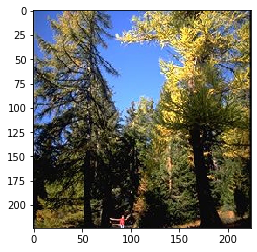

[('n09193705', 'alp', 0.9649419), ('n03792972', 'mountain_tent', 0.018696506), ('n09468604', 'valley', 0.011169933)]


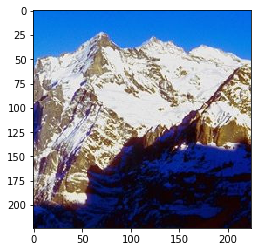

[('n09468604', 'valley', 0.34144264), ('n09193705', 'alp', 0.16270399), ('n09246464', 'cliff', 0.1448319)]


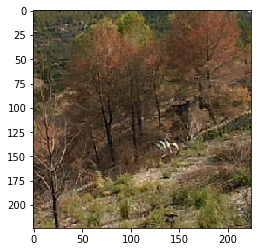

[('n09193705', 'alp', 0.9950206), ('n09468604', 'valley', 0.002199823), ('n09246464', 'cliff', 0.00085720886)]


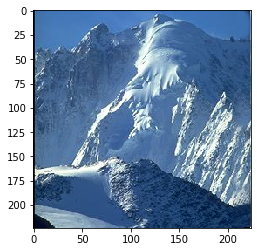

[('n09468604', 'valley', 0.060279034), ('n03743016', 'megalith', 0.031340513), ('n04589890', 'window_screen', 0.022662044)]


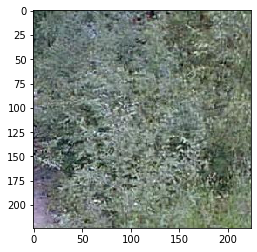

[('n09472597', 'volcano', 0.99975747), ('n09193705', 'alp', 7.704968e-05), ('n03792972', 'mountain_tent', 6.878641e-05)]


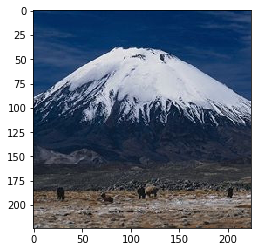

[('n03733281', 'maze', 0.31399268), ('n03792972', 'mountain_tent', 0.14448766), ('n03891251', 'park_bench', 0.04262997)]


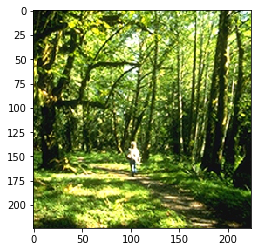

[('n09332890', 'lakeside', 0.36153373), ('n09468604', 'valley', 0.22443323), ('n09193705', 'alp', 0.19235845)]


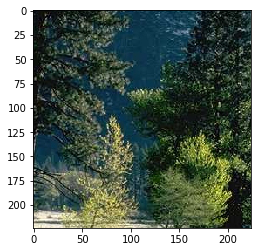

[('n09468604', 'valley', 0.49280074), ('n09246464', 'cliff', 0.43701798), ('n09193705', 'alp', 0.03688787)]


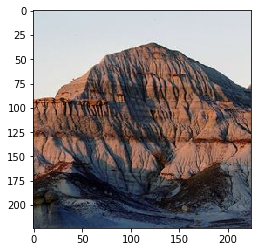

[('n09193705', 'alp', 0.86608666), ('n09468604', 'valley', 0.11366404), ('n09332890', 'lakeside', 0.0033801629)]


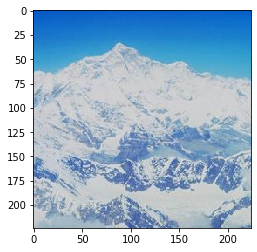

[('n03457902', 'greenhouse', 0.1856213), ('n03991062', 'pot', 0.15622982), ('n03733281', 'maze', 0.10584566)]


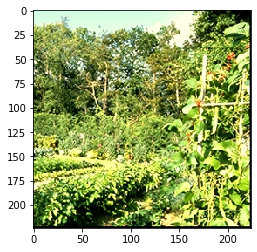

[('n09193705', 'alp', 0.88465196), ('n09468604', 'valley', 0.08602054), ('n03792972', 'mountain_tent', 0.008473986)]


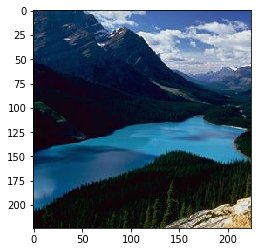

[('n09468604', 'valley', 0.33820438), ('n03991062', 'pot', 0.083855964), ('n12768682', 'buckeye', 0.052769624)]


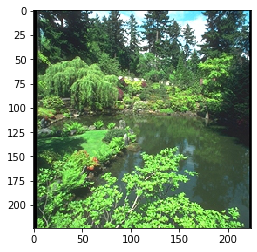

[('n09193705', 'alp', 0.94848543), ('n09468604', 'valley', 0.02472971), ('n03792972', 'mountain_tent', 0.009577466)]


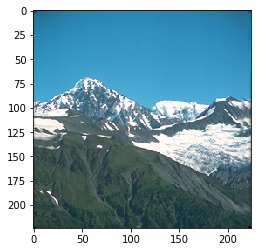

[('n09193705', 'alp', 0.7076124), ('n09468604', 'valley', 0.22255906), ('n09332890', 'lakeside', 0.045121066)]


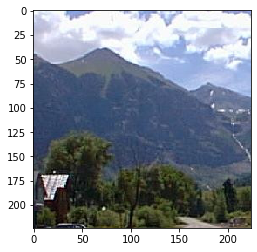

[('n09193705', 'alp', 0.7950624), ('n09468604', 'valley', 0.17050001), ('n09246464', 'cliff', 0.012934386)]


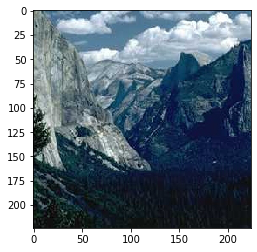

[('n09468604', 'valley', 0.5539156), ('n09246464', 'cliff', 0.3623467), ('n09193705', 'alp', 0.04804264)]


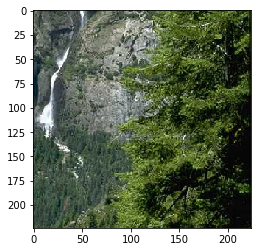

ResourceExhaustedError: OOM when allocating tensor with shape[1,1,1024,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Add] name: conv5_block1_0_conv_63/kernel/Initializer/random_uniform/

In [116]:
import random
import matplotlib.pyplot as plt

for path in random.sample(paths, 25):
    img = process_img_path(path)
    img_is_mountains(img)
    plt.imshow(img)
    plt.show();

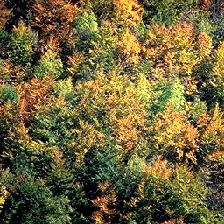

In [55]:
process_img_path(paths[0])

In [22]:
resnet = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

In [103]:
x = resnet.output
x=GlobalAveragePooling2D()(x)
x = Dense(7, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, preds)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [91]:
data = []
for i in ['forest', 'mountain']:
    for file in os.listdir('./data/'+i):
        if file[-3:] == 'jpg':
            path = os.path.join(f'./data/{i}/' + file)
            img = process_img_path(path)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            data.append(x)

In [93]:
X =np.asarray(data).reshape(len(data),224,224,3)

In [94]:
# labels
forest = [x for x in os.listdir('./data/forest') if x[-3:] == 'jpg']

mountains = [x for x in os.listdir('./data/mountain') if x[-3:] == 'jpg']

zeros = np.zeros(len(forest))
ones = np.ones(len(mountains))
zeros.shape, ones.shape
y = np.append(zeros, ones)
y.shape

(702,)

In [98]:
y = y.reshape(-1,1)

In [106]:
model.fit(X, y, epochs=10, batch_size=10, validation_split=0.1)

Train on 631 samples, validate on 71 samples
Epoch 1/10
631/631 [==============================] - 8s 12ms/sample - loss: 0.0924 - accuracy: 0.9651 - val_loss: 0.1274 - val_accuracy: 0.9155
Epoch 2/10
631/631 [==============================] - 6s 9ms/sample - loss: 0.0696 - accuracy: 0.9778 - val_loss: 0.1679 - val_accuracy: 0.8873
Epoch 3/10
631/631 [==============================] - 6s 9ms/sample - loss: 0.0767 - accuracy: 0.9746 - val_loss: 0.1115 - val_accuracy: 0.9155
Epoch 4/10
631/631 [==============================] - 6s 9ms/sample - loss: 0.0591 - accuracy: 0.9794 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 5/10
631/631 [==============================] - 6s 9ms/sample - loss: 0.0694 - accuracy: 0.9778 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 6/10
631/631 [==============================] - 6s 9ms/sample - loss: 0.0711 - accuracy: 0.9731 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 7/10
631/631 [==============================] - 6s 9ms/sample - loss: 0.0652 - accur

In [107]:
predictions = model.predict(X)


In [109]:
from collections import Counter

for i,j in zip(predictions, y):
    #if i == j:
        
    print('Model Predicted:', i)
    print('Ground Truth:', j)
    print('-'*25)

Model Predicted: [0.00053763]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00056118]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00081435]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00031087]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.0077078]
Ground Truth: [0.]
-------------------------
Model Predicted: [5.6177378e-05]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00588033]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.0002712]
Ground Truth: [0.]
-------------------------
Model Predicted: [4.2915344e-05]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00020942]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00370041]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.0088098]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00786558]
Ground Truth: [0.]
-------------------------
Model Predicted: [0.00

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language